In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as ur
from bbmag import bb_abmag, sigerr
from tdsat_sensitivity import find_limit, compute_snr
from tdsat_telescope import load_telescope_parameters
from astropy.visualization import quantity_support
%matplotlib inline

In [17]:
plt.rcParams['figure.figsize'] = [12,8]

In [5]:
# Setup:
td1_band = [193,233]*ur.nm

td2_bandwidth = [40,60,80,100,120,140,160,180,200]
td2 = []
for w in td2_bandwidth:
    td2.append([260,260+w])
    
td2_band = td2*ur.nm


dist = [100,200]*ur.Mpc

ab_vega = 1.73

# Satellite details:
diameter, qe, psf_fwhm, pixel_size, efficiency = load_telescope_parameters(6, diag=True)
outofband_qe = 0.0001
exposure = 300*ur.s

Telescope Configuration 6
Name: Two mini Big Schmidts
Entrance Pupil diameter 21.0 cm
Optical Effifiency 0.5170294784580499
PSF FWHM 2.8810000000000002 arcsec
Pixel size 4.3 arcsec
Effective Aperture 15.1 cm
Effective Area 179.0786352362522 cm2


In [3]:
# Load Tony's lightcurves
shock = np.loadtxt('input_data/shock.dat')
blukn = np.loadtxt('input_data/kilonova_blue.dat')

In [8]:
shock_mags = np.zeros([len(td2_band),len(dist),len(shock[:,0]),3])
shock_mags[:,:,:,0] = shock[:,1]
for i in range(len(td2_band)):
    for j in range(len(dist)):
        for k in range(len(shock[:,0])): 
            shock_mags[i,j,k,1:3] = bb_abmag(bbtemp=shock[k,3]*ur.K, bandone=td1_band, 
                                  bandtwo=td2_band[i], swiftmag=(shock[k,14]+ab_vega)*ur.ABmag, 
                                  dist=dist[j],val=True)

In [10]:
blukn_mags = np.zeros([len(td2_band),len(dist),len(blukn[:,0]),3])
blukn_mags[:,:,:,0] = blukn[:,0]
for i in range(len(td2_band)):
    for j in range(len(dist)):
        for k in range(len(blukn[:,0])): 
            blukn_mags[i,j,k,1:3] = bb_abmag(bbtemp=blukn[k,4]*ur.K, bandone=td1_band, 
                                  bandtwo=td2_band[i], swiftmag=(blukn[k,16]+ab_vega)*ur.ABmag, 
                                  dist=dist[j],val=True)

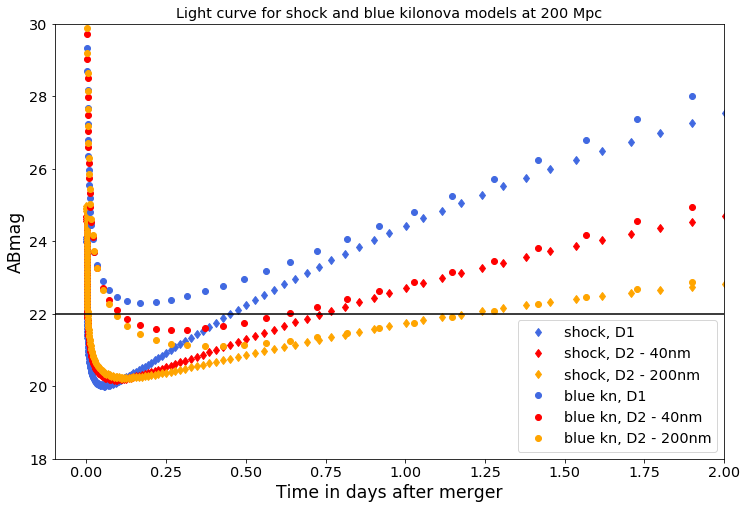

In [23]:
plt.plot(shock_mags[0,1,:,0],shock_mags[0,1,:,1],marker='d', color='royalblue', linestyle='none',label='shock, D1')
plt.plot(shock_mags[0,1,:,0],shock_mags[0,1,:,2],marker='d', color='red', linestyle='none',label='shock, D2 - 40nm')
plt.plot(shock_mags[8,1,:,0],shock_mags[8,1,:,2],marker='d', color='orange', linestyle='none',label='shock, D2 - 200nm')
color='', 
plt.plot(blukn_mags[0,1,:,0],blukn_mags[0,1,:,1],marker='o', color='royalblue', linestyle='none',label='blue kn, D1')
plt.plot(blukn_mags[0,1,:,0],blukn_mags[0,1,:,2],marker='o', color='red', linestyle='none',label='blue kn, D2 - 40nm')
plt.plot(blukn_mags[8,1,:,0],blukn_mags[8,1,:,2],marker='o', color='orange', linestyle='none',label='blue kn, D2 - 200nm')

plt.axhline(y=22,xmin=0,xmax=1,color='black')
plt.ylim(18,30)
plt.xlim(-0.1,2)
plt.legend(fontsize='x-large')
plt.xlabel('Time in days after merger',fontsize='xx-large')
plt.ylabel(r'ABmag',fontsize='xx-large')
plt.tick_params(axis='y',which='major',labelsize='x-large')
plt.tick_params(axis='x',which='major',labelsize='x-large')
plt.title('Light curve for shock and blue kilonova models at 200 Mpc',fontsize='x-large')
plt.show()

In [31]:
shock_mags[np.where(shock[:,1] == 4.10421e-02)

(array([113]),)

In [33]:
shock[113,14]+ab_vega, shock[113,3]

(-16.519099999999998, 36620.2)

In [35]:
np.where(blukn[:,0] == 5.26187e-02)

(array([19]),)

In [41]:
blukn[19,16]+ab_vega, blukn[19,4]

(-13.5357, 16855.4)

In [38]:
np.where(blukn[:,0]==2.17225e-01)

(array([24]),)

In [40]:
blukn[24,16]+ab_vega, blukn[24,4]

(-14.0011, 10952.7)